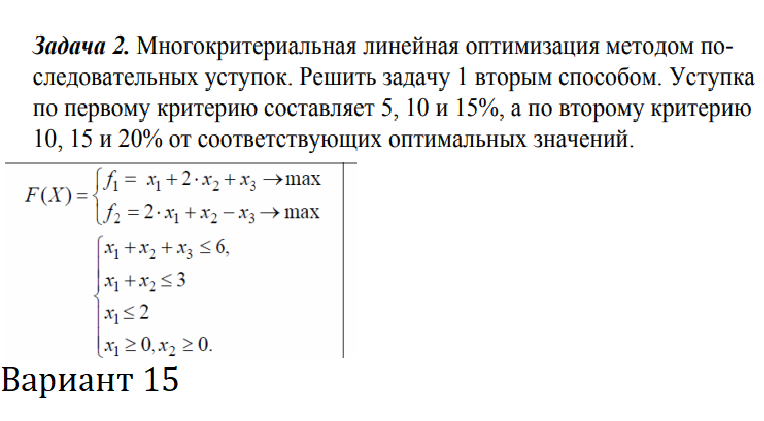

In [1]:
from IPython.display import Image
Image(filename='info.png')



In [2]:
import cvxpy as cp
import numpy as np
import math 

x1 = cp.Variable()
x2 = cp.Variable()
x3 = cp.Variable()
x4 = cp.Variable()

In [3]:
def find_max_min(check):
    x1 = cp.Variable()
    x2 = cp.Variable()
    x3 = cp.Variable()
    #ограничения по условиям задачи
    constraints = [x1+x2+x3<=6,
                   x1+x2<=3,
                   x1<=2,
                   x1>=0,
                   x2>=0,
                   x3>=0
                   ]
    if check:
        obj = cp.Maximize(x1+2*x2+x3)
    else:
       
        obj = cp.Maximize(2*x1+x2-x3)
    prob = cp.Problem(obj, constraints)
    prob.solve() 
    print("status:", prob.status)
    print("optimal val:", np.round(prob.value, 5))
    print("optimal var:\n{0:12}x1 = {1}\n{0:12}x2 = {2}".format('',np.round(x1.value, 5), np.round(x2.value, 5) ))
    return np.round(prob.value, 5)

In [4]:
max_ch = find_max_min(True)

status: optimal
optimal val: 9.0
optimal var:
            x1 = 0.0
            x2 = 3.0


In [5]:
min_ch = find_max_min(False)

status: optimal
optimal val: 5.0
optimal var:
            x1 = 2.0
            x2 = 1.0


In [6]:
print(max_ch)
conc1 = [i*max_ch for i in [0.05,0.1,0.15]]
print(conc1)

9.0
[0.45, 0.9, 1.3499999999999999]


In [7]:
print(min_ch)
conc2 = [i*min_ch for i in [0.1, 0.15, 0.2]]

constraints = [x1+x2+x3<=6,
           x1+x2<=3,
           x1<=2,
       max_ch-(x1+2*x2+x3)<=conc1[0],
           x1>=0,
           x2>=0,
           x3>=0
           ]

5.0


In [8]:
# уступки для первого критерия 

In [24]:
constraints = [x1+x2+x3<=6,
           x1+x2<=3,
           x1<=2,
       max_ch-(x1+2*x2+x3)<=conc1[0],
           x1>=0,
           x2>=0,
           x3>=0
           ]
constraints[3] =   max_ch -  (x1+2*x2+x3) <= conc1[0]

obj = cp.Maximize(2*x1+x2-x3) 
prob = cp.Problem(obj, constraints)
prob.solve() 
print("status:", prob.status)
print("optimal val:", np.round(x1.value+2*x2.value+x3.value,5))
print("optimal var:\n{0:12}x1 = {1}\n{0:12}x2 = {2}".format('',np.round(x1.value, 5), np.round(x2.value, 5) ))
print(x1.value+2*x2.value+x3.value)

status: optimal
optimal val: 8.55
optimal var:
            x1 = 0.1967
            x2 = 2.8033
8.550000000017322


In [23]:
constraints = [x1+x2+x3<=6,
           x1+x2<=3,
           x1<=2,
       max_ch-(x1+2*x2+x3)<=conc1[0],
           x1>=0,
           x2>=0,
           x3>=0
           ]
constraints[3] = max_ch -  (x1+2*x2+x3) <= conc1[1]
obj = cp.Maximize(2*x1+x2-x3)
prob = cp.Problem(obj, constraints)
prob.solve() 
print("status:", prob.status)
print("optimal val:", np.round(x1.value+2*x2.value+x3.value,5))
print("optimal var:\n{0:12}x1 = {1}\n{0:12}x2 = {2}".format('',np.round(x1.value, 5), np.round(x2.value, 5) ))

status: optimal
optimal val: 8.1
optimal var:
            x1 = 0.42423
            x2 = 2.57577


In [21]:
constraints = [x1+x2+x3<=6,
           x1+x2<=3,
           x1<=2,
       max_ch-(x1+2*x2+x3)<=conc1[0],
           x1>=0,
           x2>=0,
           x3>=0
           ]
constraints[3] = max_ch -  (x1+2*x2+x3) <= conc1[2]
obj = cp.Maximize(2*x1+x2-x3)
prob = cp.Problem(obj, constraints)
prob.solve() 

print("status:", prob.status)
print("optimal val:", np.round(x1.value+2*x2.value+x3.value,5))
print("optimal var:\n{0:12}x1 = {1}\n{0:12}x2 = {2}".format('',np.round(x1.value, 5), np.round(x2.value, 5) ))

status: optimal
optimal val: 7.65
optimal var:
            x1 = 0.65658
            x2 = 2.34342


In [12]:
# уступки для второго критерия 

In [20]:
constraints = [x1+x2+x3<=6,
           x1+x2<=3,
           x1<=2,
       max_ch-(x1+2*x2+x3)<=conc1[0],
           x1>=0,
           x2>=0,
           x3>=0
           ]
constraints[3] = min_ch -  (2*x1+x2-x3) <= conc2[0]
obj = cp.Maximize(x1+2*x2+x3)
prob = cp.Problem(obj, constraints)
prob.solve() 
print("status:", prob.status)
print("optimal val:", np.round(2*x1.value+x2.value-x3.value,5))
print("optimal var:\n{0:12}x1 = {1}\n{0:12}x2 = {2}".format('',np.round(x1.value, 5), np.round(x2.value, 5) ))

status: optimal
optimal val: 4.5
optimal var:
            x1 = 1.76495
            x2 = 1.23505


In [19]:
constraints = [x1+x2+x3<=6,
           x1+x2<=3,
           x1<=2,
       max_ch-(x1+2*x2+x3)<=conc1[0],
           x1>=0,
           x2>=0,
           x3>=0
           ]
constraints[3] = min_ch -  (2*x1+x2-x3) <= conc2[1]
obj = cp.Maximize(x1+2*x2+x3)
prob = cp.Problem(obj, constraints)
prob.solve() 
print("status:", prob.status)
print("optimal val:", np.round(2*x1.value+x2.value-x3.value,5))
print("optimal var:\n{0:12}x1 = {1}\n{0:12}x2 = {2}".format('',np.round(x1.value, 5), np.round(x2.value, 5) ))

status: optimal
optimal val: 4.25
optimal var:
            x1 = 1.66203
            x2 = 1.33797


In [18]:
constraints = [x1+x2+x3<=6,
           x1+x2<=3,
           x1<=2,
       max_ch-(x1+2*x2+x3)<=conc1[0],
           x1>=0,
           x2>=0,
           x3>=0
           ]
constraints[3] = min_ch -  (2*x1+x2-x3) <= conc2[2]
obj = cp.Maximize(x1+2*x2+x3)
prob = cp.Problem(obj, constraints)
prob.solve() 
print("status:", prob.status)
print("optimal val:", np.round(2*x1.value+x2.value-x3.value,5))
print("optimal var:\n{0:12}x1 = {1}\n{0:12}x2 = {2}".format('',np.round(x1.value, 5), np.round(x2.value, 5) ))

status: optimal
optimal val: 4.0
optimal var:
            x1 = 1.56936
            x2 = 1.43064
